A fourier transform is a way to decompose a signal into sine and cosine waves.

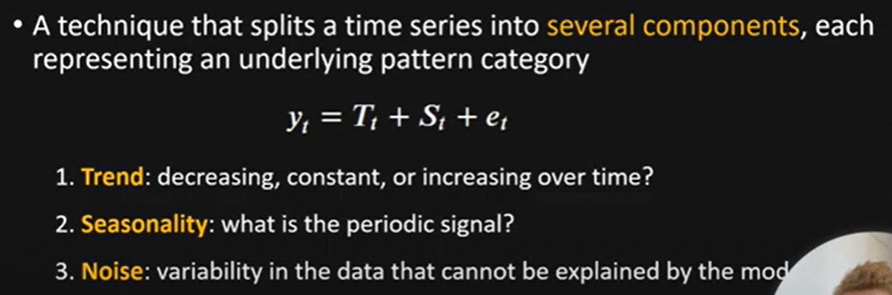    

In [1]:
import os
import numpy as np
import pandas as pd
import datetime as dt
from scipy import signal
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

dir_path = os.path.dirname(os.path.realpath('__file__'))
data_folder = os.path.join(dir_path, 'statistical analysis')
max_temp = pd.read_csv('https://raw.githubusercontent.com/ASXPortfolio/jupyter-notebooks-data/main/maximum_temperature.csv')
min_temp = pd.read_csv('https://raw.githubusercontent.com/ASXPortfolio/jupyter-notebooks-data/main/minimum_temperature.csv')

def datetime(row):
    return dt.datetime(row.Year,row.Month,row.Day)

max_temp['Date'] = max_temp.apply(datetime,axis=1)
min_temp['Date'] = min_temp.apply(datetime,axis=1)
max_temp.set_index('Date', inplace=True)
min_temp.set_index('Date', inplace=True)
drop_cols = [0,1,2,3,4,6,7]
max_temp.drop(max_temp.columns[drop_cols],axis=1,inplace=True)
min_temp.drop(min_temp.columns[drop_cols],axis=1,inplace=True)
max_temp.rename(columns={'Maximum temperature (Degree C)':'Tmax'}, inplace=True)
min_temp.rename(columns={'Minimum temperature (Degree C)':'Tmin'}, inplace=True)

temps = max_temp.merge(min_temp,how='inner',left_on=['Date'],right_on=['Date'])

def avg_temp(row):
    return (row.Tmax+row.Tmin)/2

temps['T'] = temps.apply(avg_temp,axis=1)

# drop na values here
temps = temps.dropna()

In [2]:
temps.head()

,Tmax,Tmin,T
Date,,,
1859-01-01,24.4,14.5,19.45
1859-01-02,24.4,15.7,20.05
1859-01-03,24.2,15.3,19.75
1859-01-04,24.7,17.4,21.05
1859-01-05,24.6,16.9,20.75


In [3]:
temps.shape

(59557, 3)

## Daily Average Temperature Series from Sydney Observatory


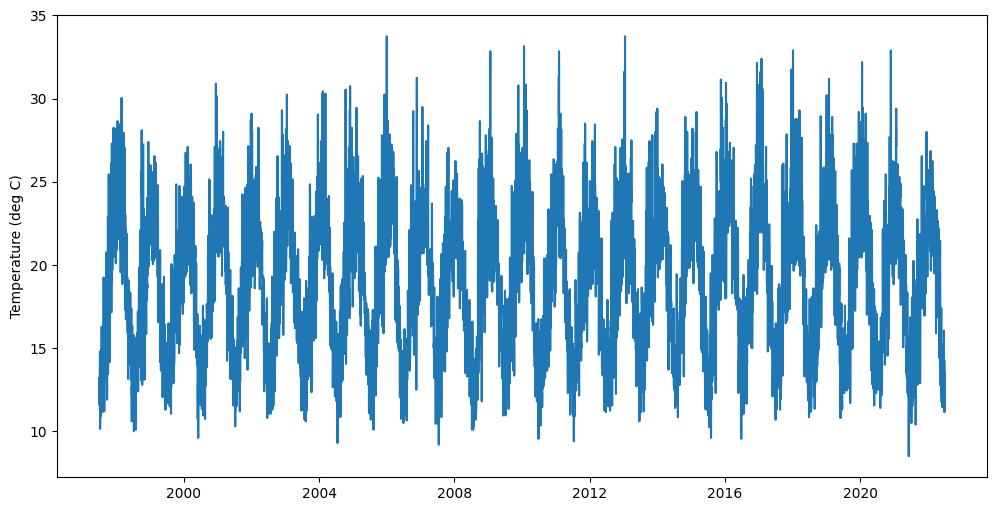

In [4]:
lookback = 365*25
fig = plt.figure(figsize=(12,6))
plt.plot(temps['T'][-lookback:])
plt.ylabel('Temperature (deg C)')
plt.show()

removing noise

We will use a simple algorithm that is used frequently in the signal processing industry, Convolutions. A convolution is a mathematical operation which generates a new function that is a function of two prior functions, meaning the convolution is the area under the curve of the two functions which are moved towards and away from one another ('convolved').

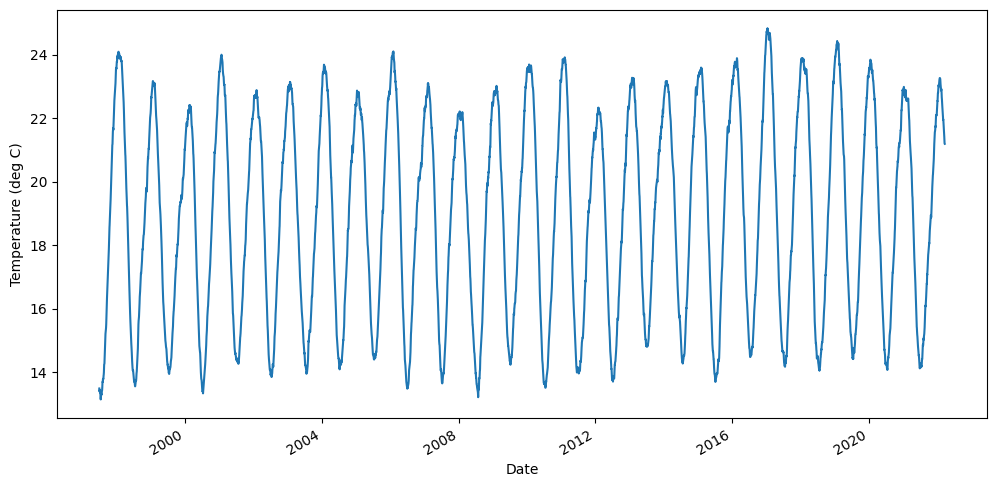

In [5]:
def apply_convolution(x, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = signal.convolve(x, conv, mode='same') / window
    return filtered

denoised = temps.apply(lambda x: apply_convolution(x, 90))
denoised['T'][-lookback:-100].plot(figsize=(12,6))
plt.ylabel('Temperature (deg C)')
plt.show()